# Antonine Regression.

log(P) = A + (A.C-B)/T - C.log(P)/T
 
 y = a0 + a1.x1 + a2.x2

In [109]:
import numpy as np

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [151]:
# Function to accept the temperature and pressure as different list.

def prepare_data(vapour_pressure, temperature):

    """ This function accepts experimental vapour_pressure and temperature
    as list and creates a dataframe.

    Args
    ========

    vapour_pressure: list of vapour pressure.
    temperature: list of temperature.

    Returns:
        A pandas dataframe.
    """
    assert len(vapour_pressure) > 0, "No value in list of vapour_pressure"
    assert len(temperature) > 0, "No value in list of temperature"
    assert len(vapour_pressure) == len(temperature), f"Length of vapour_pressure: {len(vapour_pressure)}\
    does not match temperature: {len(temperature)}"
    vapour_pressure = np.array(vapour_pressure)
    temperature = np.array(temperature)
    # vapour_pressure_log = np.log(vapour_pressure)
    # temperature_log = np.log(temperature)
    x1 = 1 / temperature
    x2 = (np.log(vapour_pressure)) / temperature
    #print("x1", x1)
    #print("x2", x2)
    y = np.log(vapour_pressure)
    X = np.vstack([x1, x2])
    #print("X", X.T)
    return X.T, y

In [152]:
def fit_model_and_calculate(X, y):
    """
    Uses X, y to train the linear regression model.
    And uses the coefficient to compute the Antoine constants.
    """
    model =  LinearRegression()
    model.fit(X, y)
    A = model.intercept_
    C = model.coef_[1]
    B = A * C - model.coef_[0]
    return A, B, C

In [156]:
def calculate_antoine_constants(vapour_pressure, temperature):
    """Compute the Anotoine constants.
    """
    X, y = prepare_data(vapour_pressure, temperature)
    return fit_model_and_calculate(X, y)

Pressure (mm Hg)	Temperature (°C)
16.5	1
42.3	5
55.7	10
69.8	20
85.5	40
95.5	60
108.6	100
128.4	200
150.6	400
174.1	760

In [157]:
press = [16.5, 42.3, 55.7, 69.8, 85.5, 95.5, 108.6, 128.4, 150.6, 174.1]
temp = [1, 5, 10, 20, 40, 60, 100, 200, 400, 760]

In [158]:
A, B, C = calculate_antoine_constants(press, temp)
A, B, C

(4.878579698399691, -34.56409564568785, -4.7679768753565765)

In [159]:
model.coef_, model.intercept_

(array([6.79549381e-16, 4.00000000e+00]), -2.7755575615628914e-16)

In [160]:
# Plot straight line.

X, _ = prepare_data(press, temp)
x1 = X[:, 0]
x2 = X[:, 1]

/tmp/ipykernel_358441/3349083030.py:8: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(line))


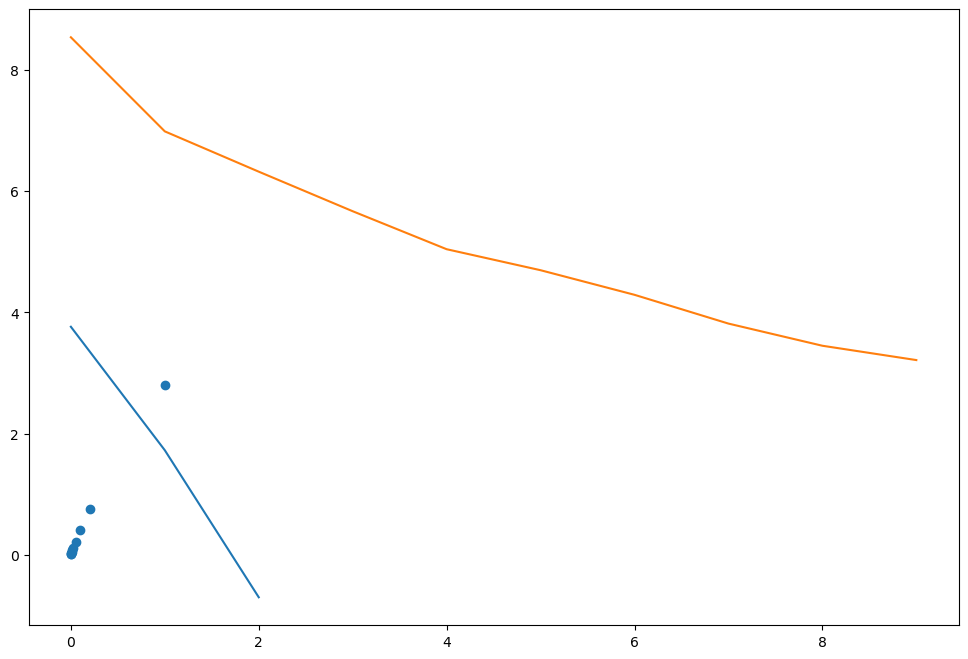

In [177]:
plt.figure(figsize=(12, 8))
plt.scatter(x1, x2)
A1 = 17.375
B1 = 4438.364
C1 = 238.953
line = (A + (B * x1) + (C * x2)) * -1
line1 = (A1 + (B1 * x1) + (C1 * x2)) * -1
plt.plot(np.log(line))
#plt.plot(np.log(line1))
plt.plot(np.log(line1 * -1))

## Observation

While I was able to get some values of A, B, C from fitting the regression line, it appears that this line is nothing near fitting the points properly.

Even despite making our X values into logarithmic values, we still have a hardtime fitting these exact curves/line of regression. Mostly due to the little amount of data that is generated.

I did also plot the line also that the hyperlinked information from the readme to obtain A, B, C. And I noticed that our line is actually of better fit than their solution, or so I think.